In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import math

from datetime import datetime
from datetime import timedelta
import datetime

from scipy import spatial
from numpy import array
from numpy import corrcoef
from scipy.spatial import distance

from sklearn.preprocessing import MinMaxScaler

def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_cossine(v1,v2):
    return (1 - spatial.distance.cosine(v1, v2))

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

def dist_correlation(dc):
    return math.sqrt(2 *(1 - dc))

def measure_angle(arcc):
    return math.degrees(np.arccos(arcc))

def measure(v1,v2):
    #return measure_correlation(v1,v2)
    return measure_correlation(v1,v2)

In [11]:
df = pd.DataFrame()
path = (os.path.abspath(".")) + "/../../../ds/supertrunfo/datasete/"
filename = "s2.csv"
file = path + str(filename)
df = pd.read_csv(file, delimiter=";", dtype={
    'nome': str, 'cil': float, 'pot':float, 'v':float, 'p':float,
    'comp':float
   })

print(df.columns)
columns = ['nome']
df.drop(columns, inplace=True, axis=1)
print(df.head())


Index(['nome', 'cil', 'pot', 'v', 'p', 'comp'], dtype='object')
      cil    pot      v       p  comp
0  3217.0  369.0  280.0  1590.0  4.51
1  3996.0  363.0  250.0  1715.0  4.76
2  3600.0  462.0  315.0  1451.0  4.45
3  5935.0  460.0  306.0  1863.0  4.67
4  5379.0  326.0  225.0  2480.0  5.65


In [13]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df)
df.loc[:,:] = scaled_values

#calculate matriz corr
n = len(df)
m=np.zeros((n,n))
for x in range(n):
    line = ""
    for y in range(n):
        m[x,y]=  round(measure(df.iloc[x],df.iloc[y]),3)
print(m)

[[1.    0.836 0.912 ... 0.674 0.448 0.699]
 [0.836 1.    0.563 ... 0.962 0.828 0.952]
 [0.912 0.563 1.    ... 0.351 0.087 0.368]
 ...
 [0.674 0.962 0.351 ... 1.    0.945 0.985]
 [0.448 0.828 0.087 ... 0.945 1.    0.95 ]
 [0.699 0.952 0.368 ... 0.985 0.95  1.   ]]


In [14]:
dfm = pd.DataFrame(m)
path = (os.path.abspath(".")) + "/../../../ds/supertrunfo/datasete/"
filename = "s2_matrix_corr_pearson1.csv"
dfm.to_csv(path+filename)


matriz_cor = df.transpose().corr()
print(matriz_cor)

          0         1         2         3         4         5         6   \
0   1.000000  0.836481  0.912440  0.468881  0.266986  0.071633  0.683430   
1   0.836481  1.000000  0.562824  0.535386  0.738674  0.558231  0.922306   
2   0.912440  0.562824  1.000000  0.487012 -0.118729 -0.192026  0.341483   
3   0.468881  0.535386  0.487012  1.000000  0.279640  0.615835  0.258217   
4   0.266986  0.738674 -0.118729  0.279640  1.000000  0.836110  0.853824   
5   0.071633  0.558231 -0.192026  0.615835  0.836110  1.000000  0.527126   
6   0.683430  0.922306  0.341483  0.258217  0.853824  0.527126  1.000000   
7   0.206962  0.637758 -0.031841  0.728002  0.809659  0.985820  0.563750   
8   0.628089  0.927962  0.264893  0.310018  0.854318  0.622665  0.923050   
9   0.438592  0.791411  0.189085  0.748074  0.763717  0.893450  0.638590   
10  0.431047  0.846688  0.091326  0.541034  0.916536  0.885917  0.804169   
11  0.525445  0.890781  0.194781  0.544390  0.869714  0.820246  0.816934   
12 -0.123325

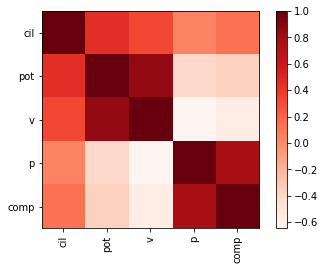

In [15]:
plt.imshow(df.corr(), cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

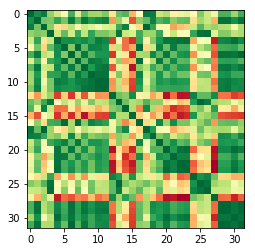

In [16]:


plt.imshow(df.T.corr(), cmap=plt.cm.RdYlGn)
plt.show()

